In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
import time
import os

from datetime import date
from datetime import timedelta
from datetime import datetime

import pickle

import json

import pandas as pd
import numpy as np
import random 


import pandas_ta as ta

import mplfinance as mpf 

In [3]:
from handle_data.read_data import load_candles

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [5]:
history_days = 50 * 30
history_days = 200

start_date = (date.today() - timedelta(days=history_days)).strftime('%Y-%m-%d')
end_date=None

symbol = "BTC/USDT"
symbol = "HNT/USDT"
#start_date ="2017-11-13"

print("start_date:",start_date)
print("end_date:",end_date)

timeframe='1d'
exchange='Kucoin'

start_date: 2023-07-05
end_date: None


In [6]:
data = load_candles(exchange, symbol, timeframe=timeframe, start_date=start_date, end_date=end_date, )

reading /home/jovyan/work/data/HNT-USDT/1d/HNT-USDT_1d_Kucoin.pickle


In [7]:
#data

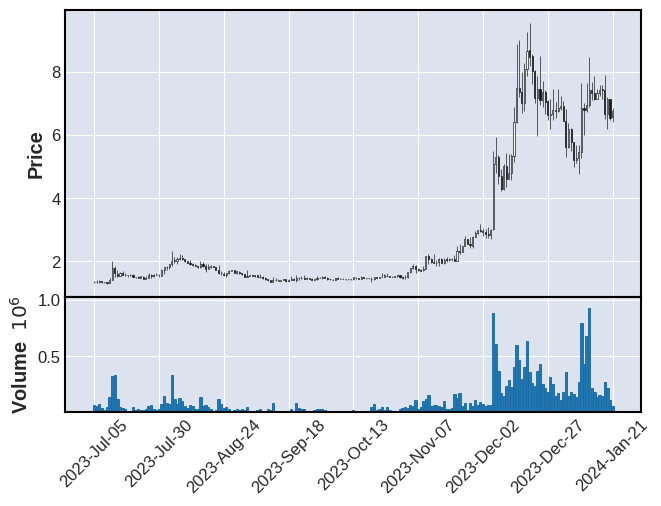

In [8]:
# https://github.com/matplotlib/mplfinance/blob/master/examples/addplot_legends.ipynb

mpf.plot(data, type='candle', volume=True,) 

In [9]:
if timeframe=='1m':
    length = 7
    multiplier = 1
elif timeframe=='15m':
    length = 7
    multiplier = 1
elif timeframe=='1h':
    length = 7
    multiplier = 1
elif timeframe=='1d':
    length = 34
    multiplier = 2
    #length = 13
    #multiplier = 1
elif timeframe=='1w':
    length = 9
    multiplier = 1

In [10]:
data["dema"] = ta.dema(close = data.Close, length=length)
data["stdev"] = ta.stdev(close = data.Close, length=length)

data["dema_low"] = ta.dema(close = data.Low, length=length)
data["stdev_low"] = ta.stdev(close = data.Low, length=length)


In [11]:
data["upper"] = data["dema"] + (multiplier * data["stdev"])
data["lower"] = data["dema"] - (multiplier * data["stdev"])

data["lower_low"] = data["dema_low"] - (multiplier * data["stdev_low"])

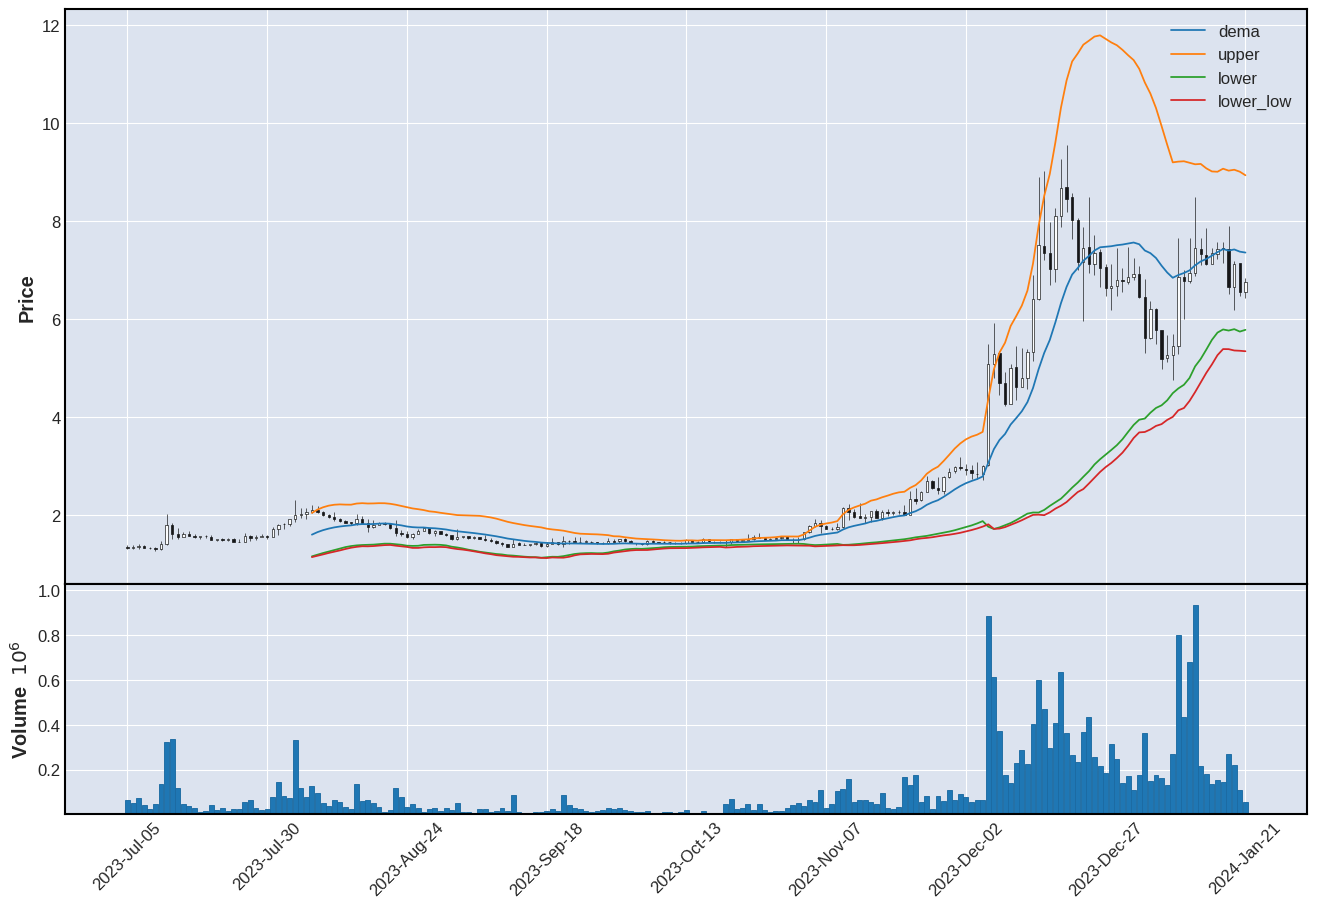

In [12]:
apdict = [mpf.make_addplot(data['dema'],label="dema"),
          mpf.make_addplot(data['upper'],label="upper"),
          mpf.make_addplot(data['lower'],label="lower"),
          mpf.make_addplot(data['lower_low'],label="lower_low"),]

mpf.plot(data,type='candle', volume=True,addplot=apdict,figratio=(30,20),figscale=2)

In [13]:
mpf.plot(data,type='candle', volume=True,addplot=apdict,figratio=(30,20),figscale=2,savefig=f"_fast_view_{symbol.replace('/','-')}_{timeframe}_plot.png")

In [14]:
stop_loss = data["lower"][-1:].iloc[0]
stop_price = data["lower_low"][-1:].iloc[0]

print(f"Fix stop loss at: {stop_loss} with stop price at: {stop_price} for {timeframe}")

Fix stop loss at: 5.785463146420976 with stop price at: 5.348763808714817 for 1d


In [15]:
excel_file_name = "_fast_view_sample_data.xlsx"

with pd.ExcelWriter(excel_file_name, engine='xlsxwriter') as writer:
    data.to_excel(writer, index=True)
    
csv_file_name = "_fast_view_sample_data.csv"
data.to_csv(csv_file_name)

In [16]:
data

,Open,High,Low,Close,Volume,dema,stdev,dema_low,stdev_low,upper,lower,lower_low
Open time,,,,,,,,,,,,
2023-07-05,1.349,1.389,1.311,1.337,63296.243600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-06,1.333,1.400,1.319,1.346,52858.915000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-07,1.346,1.414,1.311,1.376,73291.819500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-08,1.376,1.395,1.328,1.335,40890.718500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-09,1.339,1.359,1.318,1.341,22620.270900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-10,1.342,1.351,1.280,1.317,48185.666000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-11,1.314,1.470,1.302,1.416,137069.980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-12,1.419,2.017,1.396,1.797,322521.323600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-13,1.795,1.848,1.507,1.618,336777.533300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
